# Comparison Between Models

Comparison between Random Forest, Naive Bayes, Decision Tree and KNN algorithms in terms of time and accuracy on the IRIS Dataset.

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn import metrics 
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
my_cols=["Id","SepalL","SepalW","PetalL","PetalW","Species"]
my_cols

['Id', 'SepalL', 'SepalW', 'PetalL', 'PetalW', 'Species']

In [13]:
iris=pd.read_csv('iris.csv',names=my_cols)
myiris=iris[1:]

In [14]:
type(myiris)

pandas.core.frame.DataFrame

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


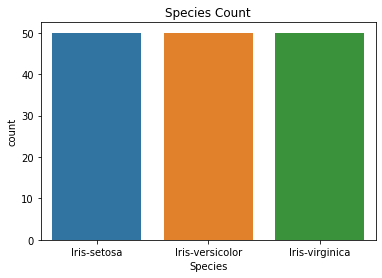

In [18]:
plt.title('Species Count')
sns.countplot(myiris['Species']);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


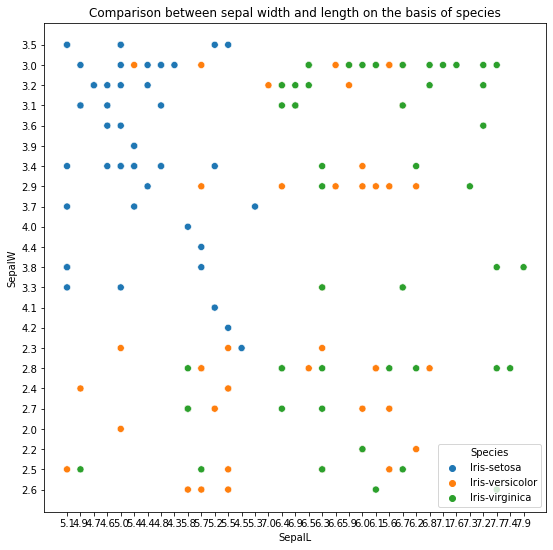

In [21]:
plt.figure(figsize=(9,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(myiris['SepalL'], myiris['SepalW'], hue = myiris['Species'], s= 50);

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


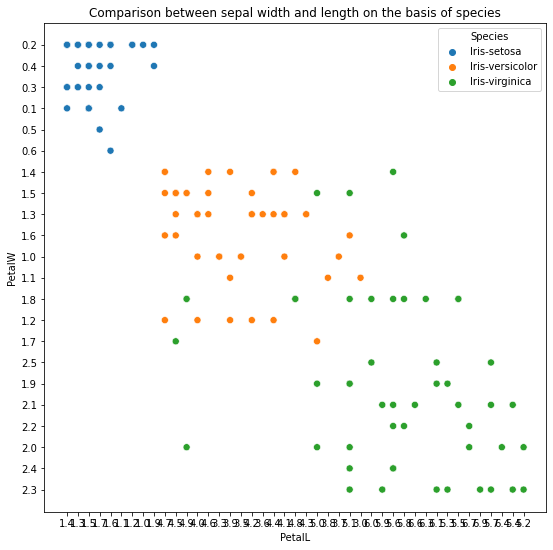

In [22]:
plt.figure(figsize=(9,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(myiris['PetalL'], myiris['PetalW'], hue = myiris['Species'], s= 50);

### NaiveBayes
NaiveBayes is being tested for speed and accuracy on the IRIS Dataset

In [26]:
X=myiris[['SepalL', 'SepalW', 'PetalL', 'PetalW']] 
y=myiris['Species']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [27]:
X

,SepalL,SepalW,PetalL,PetalW
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


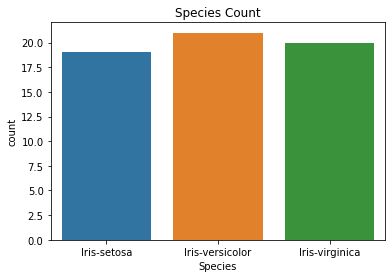

In [29]:
plt.title('Species Count in Test Set')
sns.countplot(y_test);

In [54]:
start_time=time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
end_time=time.time()

In [55]:
gnb_time=end_time-start_time
print("Time taken by Naive Bayes to predict = ",gnb_time)

Time taken by Naive Bayes to predict =  0.034776926040649414


In [56]:
gnb_accuracy=metrics.accuracy_score(y_test, y_pred)*100
print("Gaussian Naive Bayes model accuracy(in %):",gnb_accuracy)

Gaussian Naive Bayes model accuracy(in %): 95.0


In [57]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 19]])

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


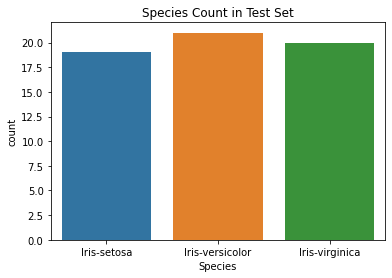

In [58]:
plt.title('Species Count in Test Set')
sns.countplot(y_test);

### Decision Tree

Decision Tree is being tested for speed and accuracy on the iris dataset.

In [59]:
X=myiris[['SepalL', 'SepalW', 'PetalL', 'PetalW']] 
y=myiris['Species']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [71]:
start_time=time.time()

myclassifier = DecisionTreeClassifier()
myclassifier = myclassifier.fit(X_train,y_train)
y_pred = myclassifier.predict(X_test)

end_time=time.time()

In [73]:
decisiontree_time=end_time-start_time
print("Time taken by Decision Tree to predict = ",decisiontree_time)

Time taken by Decision Tree to predict =  0.05727386474609375


In [64]:
decisiontree_accuracy=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy of Decision Tree:(in %)",decisiontree_accuracy)

Accuracy of Decision Tree:(in %) 96.66666666666667


In [52]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 19]])

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


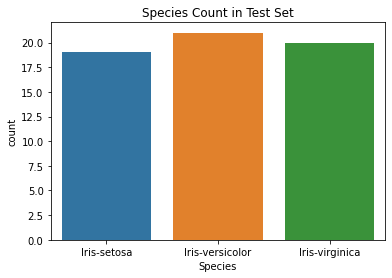

In [80]:
plt.title('Species Count in Test Set')
sns.countplot(y_test);

### Random Forest

Random Forest is being tested for speed and accuracy

In [74]:
X=myiris[['SepalL', 'SepalW', 'PetalL', 'PetalW']] 
y=myiris['Species']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [75]:
start_time=time.time()

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

end_time=time.time()

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf.predict([[3, 5, 4, 2]])

Accuracy: 0.9666666666666667


array(['Iris-versicolor'], dtype=object)

In [77]:
randomforest_time=end_time-start_time
print("Time taken by Decision Tree to predict = ",randomforest_time)

Time taken by Decision Tree to predict =  0.5879793167114258


In [78]:
randomforest_accuracy=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy of Decision Tree:(in %)",randomforest_accuracy)

Accuracy of Decision Tree:(in %) 96.66666666666667


In [81]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 19]])

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


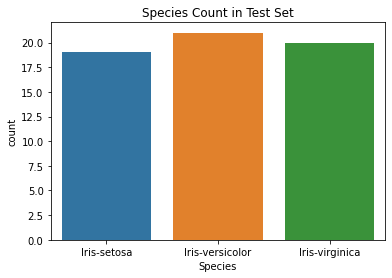

In [79]:
plt.title('Species Count in Test Set')
sns.countplot(y_test);

#### KNN 

K Nearest Neighbours is being tested for speed and accuracy.

In [83]:
X=myiris[['SepalL', 'SepalW', 'PetalL', 'PetalW']] 
y=myiris['Species']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [86]:
start_time=time.time()
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
end_time=time.time()

In [88]:
knn_time=end_time-start_time
print("Time taken by Random Forest to predict = ",knn_time)

Time taken by Random Forest to predict =  0.0397183895111084


In [92]:
knn_accuracy=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy of Random Forest:(in %)",knn_accuracy)

Accuracy of Random Forest:(in %) 96.66666666666667


In [93]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 19]])

/home/rishabh/myfiles/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


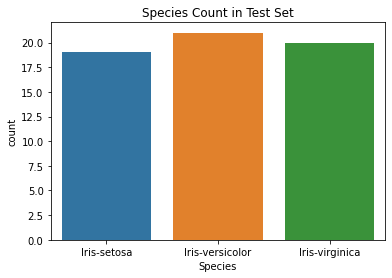

In [94]:
plt.title('Species Count in Test Set')
sns.countplot(y_test);

All 4 models done
Now time to check the speed and accuracy

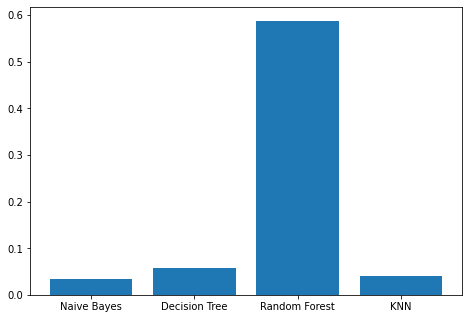

In [95]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mymodels = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN']
mytimes = [gnb_time,decisiontree_time,randomforest_time,knn_time]
ax.bar(mymodels,mytimes)
plt.show()

In [96]:
print(mytimes)

[0.034776926040649414, 0.05727386474609375, 0.5879793167114258, 0.0397183895111084]


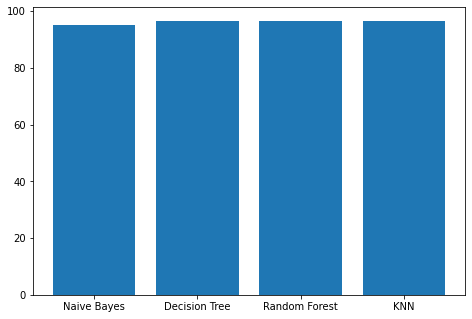

In [97]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mymodels = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN']
mytimes = [gnb_accuracy,decisiontree_accuracy,randomforest_accuracy,knn_accuracy]
ax.bar(mymodels,mytimes)
plt.show()